In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Case Study: DEF Co.

DEF Co. gave you cost data in the form of `dataset.csv` where x is the independent variable and y is the dependent variable.

Use linear regression to find the equation for the line of best fit.

In [2]:
DEF = pd.read_csv('dataset1.csv')

In [3]:
x = DEF['x'].to_numpy().reshape(-1,1)
y = DEF['y'].to_numpy().reshape(-1,1)

In [4]:
model = LinearRegression().fit(x,y)

In [5]:
y_pred = model.predict(x)

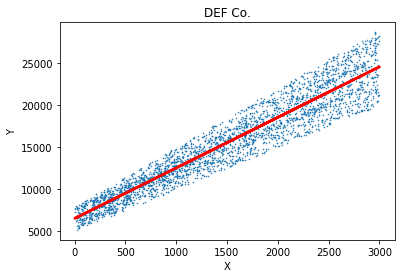

In [6]:
plt.scatter(DEF['x'], DEF['y'], s=0.3)
plt.title('DEF Co.')

plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y_pred, color='red', linewidth=2.5)
plt.show()

In [7]:
model.predict(np.array([[0]]))

array([[6528.68905569]])

In [8]:
model.predict(np.array([[1]])) - model.predict(np.array([[0]]))

array([[6.01216225]])

In [9]:
model.predict(np.array([[2]])) - model.predict(np.array([[1]]))

array([[6.01216225]])

Our Linear Regression model reveals that the equation for DEF Co. is

$\Large{y\ =\ 6,528.689 + 6.012X}$

## Vectorization: Example

Let us take a look at the first 5 items of our data set.

In [10]:
DEF['y_pred'] = y_pred

DEF.head()

,x,y,y_pred
0,2526,18701,21715.410893
1,835,11317,11548.844533
2,2974,21964,24408.859580
3,2403,19460,20975.914937
4,2741,26588,23008.025777


On the first item, we have activity level (x) of 2,526.

While the actual cost (y) was 18,701, our model (${y\ =\ 6,528.689 + 6.012X}$) gave us an output of 21,715.41

In [11]:
print(f"{6_528.689 + 6.01216 * 2_526:,.7}")

21,715.41


We are familiar with the algebraic method above where we simply substitute the value of x to get the Y value.

We can also express this into a *vectorized* or *matrix* form.

${\begin{bmatrix}1 & 2,526\end{bmatrix} \begin{bmatrix}
6,528.689 \\6.012 \\ \end{bmatrix}=\begin{bmatrix}21,715.41\end{bmatrix}}$
 
(Check: a 1x2 matrix multiplied by a 2x1 matrix should yield a 1x1 matrix)
 
 This is the same as:
 
${\begin{bmatrix}1 & x \\ \end{bmatrix}
\begin{bmatrix}w_{0} \\ w_{1} \end{bmatrix} = \begin{bmatrix}w_{0}\ +\ w_{1}x\end{bmatrix}}$

The first 5 items of our data set can be expressed in matrix form as follows:

${\begin{bmatrix}
1 & 2,526 \\
1 & 835\\
1 & 2,974\\
1 & 2,403\\
1 & 2,741
\end{bmatrix} 
\begin{bmatrix}
6,528.689 \\
6.012
\end{bmatrix}
=\begin{bmatrix}
21,715.41 \\
11,548.84 \\
24,408.86 \\
20,975.91 \\
23,008.03\end{bmatrix}}$

(Check: a 5x2 matrix multiplied by a 2x1 matrix should yield a 5x1 matrix)

This is the same as:

${
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2}\\
1 & x_{3}\\
1 & x_{4}\\
1 & x_{5}
\end{bmatrix} 
\begin{bmatrix}
w_{0} \\
w_{1}\end{bmatrix} = \begin{bmatrix}
w_{0}\ +\ x_{1}\times{w_{1}}\\
w_{0}\ +\ x_{2}\times{w_{1}} \\
w_{0}\ +\ x_{3}\times{w_{1}} \\
w_{0}\ +\ x_{4}\times{w_{1}} \\
w_{0}\ +\ x_{5}\times{w_{1}}
\end{bmatrix}}$

In [12]:
xs = np.array([
    [1, 2_526],
    [1, 835],
    [1, 2_974],
    [1, 2_403],
    [1, 2_741],
])

xs

array([[   1, 2526],
       [   1,  835],
       [   1, 2974],
       [   1, 2403],
       [   1, 2741]])

In [13]:
weights = np.array([
    [6528.689],
    [6.01216]
])

weights

array([[6.528689e+03],
       [6.012160e+00]])

In [14]:
np.matmul(xs, weights)

array([[21715.40516],
       [11548.8426 ],
       [24408.85284],
       [20975.90948],
       [23008.01956]])

## Vectorization: Hypothesis Function

The power of the vectorized notation is that instead of plugging individual numbers one by one into our equation, all points in the data set can be calculated in a single operation (e.g. matrix multiplication).

${
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2}\\
1 & x_{3}\\
\vdots \\
1 & x_{3000}
\end{bmatrix} 
\begin{bmatrix}
w_{0} \\
w_{1}\end{bmatrix} = \begin{bmatrix}
w_{0}\ +\ x_{1}\times{w_{1}}\\
w_{0}\ +\ x_{2}\times{w_{1}} \\
w_{0}\ +\ x_{3}\times{w_{1}} \\
\vdots \\
w_{0}\ +\ x_{3000}\times{w_{1}}
\end{bmatrix}}$


(Check: a 3000x2 matrix multiplied by a 2x1 matrix should yield a 3000x1 matrix)

The matrix shown above is written in such a way that each of the elements in the product matrix will produce

${w_{0}\ +\ x_{n}\times{w_{1}}}$ 

where:

${w_{0}}$ is the y-intercept of the equation (e.g. 6,528.689)

${x_{n}}$ is the *n*th element of the independent variable, and

${w_{1}}$ is the ... slope of the line (e.g. 6.012)

The matrix containing the ${X}$ values are called *features*.

The matrix containing the ${w}$ values are called *weights*, *parameters*, or *beta* (${\beta}$). Outside of regression (e.g. classification), the weights could also be referred to as *theta* (${\theta}$).

${\begin{bmatrix}
1 & x_{1} \\
1 & x_{2}\\
1 & x_{3}\\
\vdots \\
1 & x_{3000}
\end{bmatrix} 
\begin{bmatrix}
\theta_{0} \\
\theta_{1}\end{bmatrix} = \begin{bmatrix}
\theta_{0}\ +\ x_{1}\times{\theta_{1}}\\
\theta_{0}\ +\ x_{2}\times{\theta_{1}} \\
\theta_{0}\ +\ x_{3}\times{\theta_{1}} \\
\vdots \\
\theta_{0}\ +\ x_{3000}\times{\theta_{1}}
\end{bmatrix}}$


Another power of the vectorized notation is that we can add multiple independent variables as we wish.

${
\begin{bmatrix}
1 & x_{1,1} & x_{1,2}\\
1 & x_{2,1} & x_{2,2}\\
1 & x_{3,1} & x_{3,2}\\
& \vdots &  \\
1 & x_{3000,1} & x_{3000,2}
\end{bmatrix} 
\begin{bmatrix}
\theta_{0} \\
\theta_{1}\\
\theta_{2}
\end{bmatrix} = \begin{bmatrix}
\theta_{0}\ +\ x_{1,1}\times{\theta_{1}} +\ x_{1,2}\times{\theta_{2}}\\
\theta_{0}\ +\ x_{2,1}\times{\theta_{1}} +\ x_{2,2}\times{\theta_{2}}\\
\theta_{0}\ +\ x_{3,1}\times{\theta_{1}} +\ x_{3,2}\times{\theta_{2}}\\
\vdots \\
\theta_{0}\ +\ x_{3000,1}\times{\theta_{1}} +\ x_{3000,2}\times{\theta_{2}}
\end{bmatrix}}$

Or simply,

${
\begin{bmatrix}
1 & x_{1} & x_{2}
\end{bmatrix} 
\begin{bmatrix}
\theta_{0} \\
\theta_{1}\\
\theta_{2}\end{bmatrix} = \begin{bmatrix}
\theta_{0} & \theta_{1} & \theta_{2}\end{bmatrix}
\begin{bmatrix}
1 \\
x_{1} \\
x_{2}
\end{bmatrix} = \begin{bmatrix}
\theta_{0}\ +\ \theta_{1}x_{1} +\ \theta_{2}x_{2}\\
\end{bmatrix}}$

where ${x_{n}}$ is a matrix representing a set of data for feature *n*. Hence, in all cases where ${x_{0} = 1}$, then

${
\begin{bmatrix}
\theta_{0} & \theta_{1} & \theta_{2}\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2}
\end{bmatrix} =
\begin{bmatrix}
\theta_{0}x_{0}\ +\ \theta_{1}x_{1} +\ \theta_{2}x_{2}\\
\end{bmatrix}}$

Our hypothesis function ${h(x)}$ is

$\Large{h(x)\ =\ \theta_{0}x_{0}\ +\ \theta_{1}x_{1} +\ \theta_{2}x_{2}\ +\ ...\ +\ \theta_{n}x_{n}\ =\ \theta^{T}X}$

Following this notation, we can depict the earlier example as:

${
\begin{bmatrix}
6,528.689 & 6.012
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
2,526 & 835 & 2,974 & 2,403 & 2,741
\end{bmatrix} = \begin{bmatrix}
21,715.41 &
11,548.84 &
24,408.86 &
20,975.91 &
23,008.03\end{bmatrix}
}$

(Check: a 1x2 matrix multiplied by a 1x5 matrix should yield a 1x5 matrix)

In [15]:
X = np.matrix.transpose(xs)

X

array([[   1,    1,    1,    1,    1],
       [2526,  835, 2974, 2403, 2741]])

In [16]:
weights

array([[6.528689e+03],
       [6.012160e+00]])

In [17]:
np.matmul(np.matrix.transpose(weights), X)

array([[21715.40516, 11548.8426 , 24408.85284, 20975.90948, 23008.01956]])